In [12]:
# Toggle on-off code text  
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value="Click to toggle on/off the raw code.">
</form>''')

# What, Where and Wine

Determining wine characteristics and region of origin of the *Wine Data Set*; and creating a classifier using *k-Nearest Neighbor algorithm*

<img src='resources/images/wines.jpg'>

##  Executive Summary

Using the **Wine Data Set** available in the *sklean* library, we have tried to first, determine the wine characteristics and in which region of Italy do the wine samples from this dataset originated with the use of the dataset features and other external references; and second, create a classification model using the k-Nearest Neighbor (kNN) algorithm.

For the first objective, we discovered that the higher the alcohol content in wine is, the more likely it is to come from or cultivated from regions with warmer climates. Since a big portion of wines from this dataset has medium alcohol levels, they most probably came from the Northern and Central regions of Italy.

For the second objective, we were able to create a classifier with $70.18\%$ test accuracy. We believe that the prediction accuracy can still be further improved using other classification algorithms, which will not be anymore part of this notebook.

This notebook contains the following sections:

[1. Introduction](#intro)<br>
[2. Exploratory Data Analysis (EDA)](#eda)<br>
[3. Objectives](#obj)<br>
[3.1 Determining Wine Characteristics and Region of Origin](#obj1)<br>
[3.2 k-Nearest Neigbor (kNN) Machine Learning Classification](#obj2)<br>
[References](#ref)

## 1. Introduction
<span id='intro'></span>

Did you know that on average, the alcohol by volume (ABV) or the standard measure of alcohol content for beer is 4.5%, but for wine it is 11.6% [1]? Does this mean you will get drunk more easily if you choose to drink wine instead of beer? Yes and no; well that depends on how much you will be drinking right? But what's interesting with wines is that they have wide range of flavors. There are what they called citrusy, peppery, biscuit, medicinal, oaky, etc. Does these wine flavors and characteristics dependent on how and and where the they are manufactured and cultivated? Are Italy's wines taste different from those that originated from France?

For this analysis, we will be having two main objectives:
   1. Determine wine characteristics and region of origin; and
   2. Create a classification model using k-Nearest Neighbor algorithm

## 2. Exploratory Data Analysis (EDA)
<span id='eda'></span>

### 2.1 Dataset Description

For this analysis, we will be using the **Wine Data Set** which is available in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine). This dataset is the result of a chemical analysis of wines grown in the same region in Italy by three different cultivators. The dataset is also available in the `sklearn` library and we will just load the data from there for convenience.

In [1]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline

# import Wine Data Set from sklearn
from sklearn.datasets import load_wine

In [2]:
# load the wine dataset
dataset = load_wine()

# display dataset content
print('Returned Object:', type(dataset))

Returned Object: <class 'sklearn.utils.Bunch'>


The `load_wine` function, as well as other dataset functions of sklearn (e.g., *load_iris*) returns a `Bunch` object which is very similar with a dictionary when it comes to structure. Let's see what data we can get from this data by enumerating its keys.

In [3]:
print('dataset keys:')
print(dataset.keys())

dataset keys:
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


The dataset object has 6 keys. The `DESCR` item usually tells us what we initially need to know about the dataset. Let's display the first 1,615 characters of the DESCR to know more about our data (*1,615 is not a magic number. This is the result of my trial and error*).

In [3]:
print(dataset['DESCR'][:1615])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

The data description is telling us that that this dataset has **13 features** and **3 targets/classes**. This is actually the same values we can get if we display the `feature_names` and `target_names`.

The *Summary Statistics* is simply showing us the *min, max, mean,* and *standard deviation (SD)* of the values for each features.

I am not really sure what `frame` is, but it is empty for this dataset. the `data` and `target` on the other hand contains the values for for features and target respectively. Displayed below are the contents of the data and target items.

In [4]:
print('Features data:')
print(dataset['data'])

print('\nTarget/Class data:')
print(dataset['target'])

Features data:
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

Target/Class data:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Let us convert our dataset into a DataFrame for further checking analysis.

In [5]:
df_wine = pd.DataFrame.from_dict(dataset['data'])
# sets the column names
df_wine.columns = dataset['feature_names']
# add the target column
df_wine['Target'] = dataset['target']

In [6]:
print('Dataset shape:')
print(df_wine.shape)

Dataset shape:
(178, 14)


The dataset have **178 rows** and **14 columns** (including the `Target`).

In [7]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  Targe

It seems like our dataset only contains numerical values (*Good for us!*). No need to do any one-hot encoding for later's machine learning procedure.

### 2.2 NULL Values

In [8]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
Target                          0
dtype: int64

The dataset does not have any NULL values (*Yay! Less work for us!*).

### 2.3 Data Overview

Using pairplot, let us visualize our dataset and have an idea about its distribution.

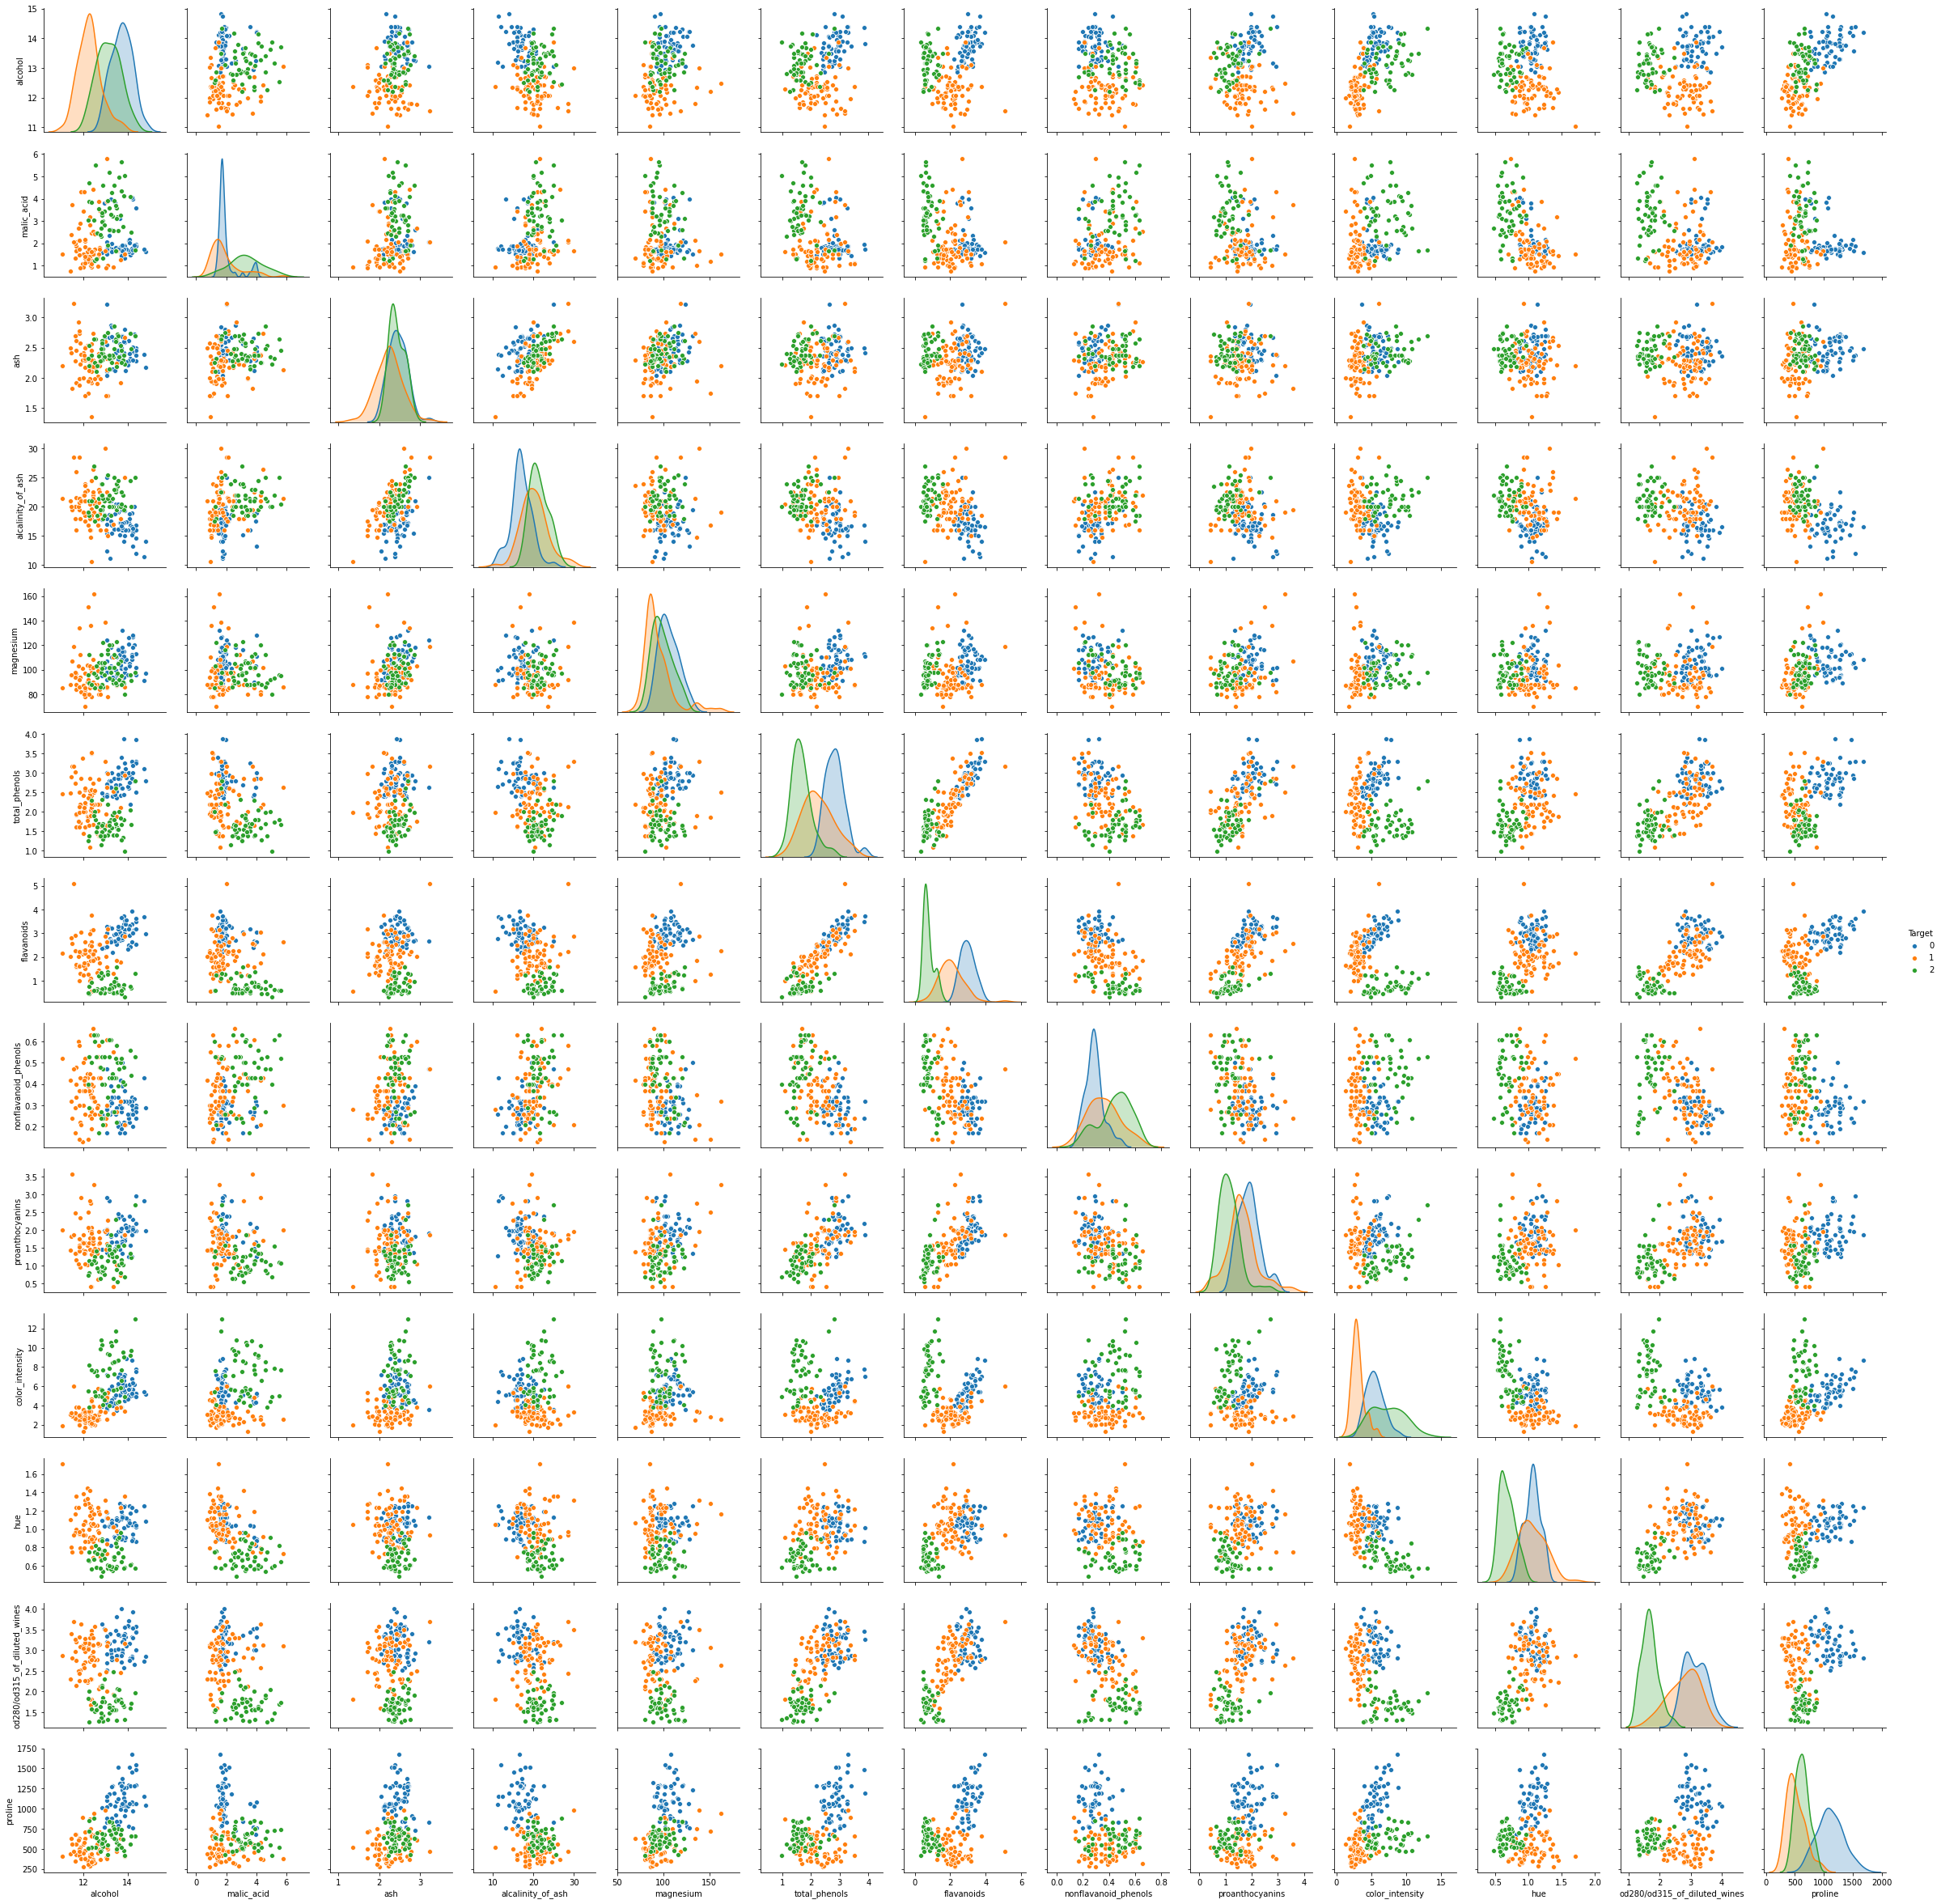

In [10]:
sns.pairplot(df_wine, hue='Target')
plt.show()

The three colors corresponds to the **three wine classes**. The graph is a bit challenging to look at because it is trying to visualize a lot of feature pairs; yet for some of the pairs,  we can see that there are clear separation between the three classes.

### 2.4 Feature Correlation

Using the `corr` function of pandas DataFrame, we can compute for the *Correlation Coefficients* (Pearson by default)  for each of the pairs.

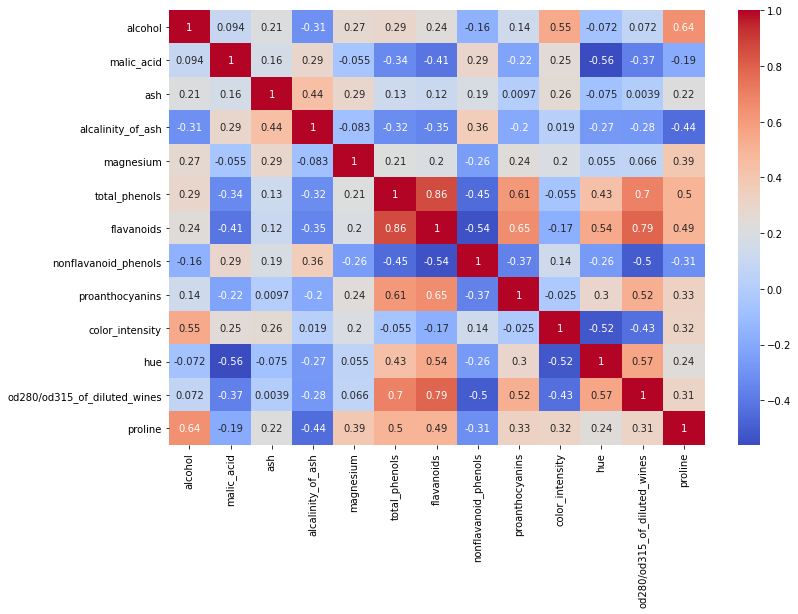

In [9]:
fig, ax = plt.subplots(figsize=(12,8))

# we drop the Target column because it is not part of the features
df_corr = df_wine.drop('Target', axis=1).corr()
ax = sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.show()

These are a lot of numbers but we can easily identify those with high correlation through the intensity of the color. To narrow down and explicitly identify highly correlated features, let's try to get the top 10 highest correlated features (regardless if positively or negatively correlated) through code.

In [10]:
corr_series = df_corr.unstack()
# remove rows whose value is 1 because it is just a correlation by itself
corr_series = corr_series[corr_series != 1]

# get the absolute value because we are interested bot in positive and negative correlation
# get the top 10 highest correlated pairs
top_corr = corr_series.abs().sort_values(ascending=False).drop_duplicates()[:10]

print('Top 10 highest correlated pairs:')
print(top_corr)

Top 10 highest correlated pairs:
flavanoids                    total_phenols                   0.864564
                              od280/od315_of_diluted_wines    0.787194
total_phenols                 od280/od315_of_diluted_wines    0.699949
proanthocyanins               flavanoids                      0.652692
alcohol                       proline                         0.643720
total_phenols                 proanthocyanins                 0.612413
od280/od315_of_diluted_wines  hue                             0.565468
malic_acid                    hue                             0.561296
color_intensity               alcohol                         0.546364
flavanoids                    hue                             0.543479
dtype: float64


The data shows that like **flavonoids** and **total_phenols** have the highest correlation with a Correlation Coefficient (CC) of **$0.86$**

If we want to know if these are positively or negatively correlated, we can get the values from the original correlation series (`corr_series`) using the index of `top_corr`.

In [11]:
print('Top 10 highest correlated pairs:')
# get index from top_corr
print(corr_series[top_corr.index])

Top 10 highest correlated pairs:
flavanoids                    total_phenols                   0.864564
                              od280/od315_of_diluted_wines    0.787194
total_phenols                 od280/od315_of_diluted_wines    0.699949
proanthocyanins               flavanoids                      0.652692
alcohol                       proline                         0.643720
total_phenols                 proanthocyanins                 0.612413
od280/od315_of_diluted_wines  hue                             0.565468
malic_acid                    hue                            -0.561296
color_intensity               alcohol                         0.546364
flavanoids                    hue                             0.543479
dtype: float64


Looks like there is only 1 negatively correlated pairs in the list: `malic_acid` and `hue`.

## 3. Objectives
<span id='obj'></span>

### 3.1 Determining Wine Characteristics and Region of Origin
<span id='obj1'></span>

Although it is not explicitly stated which particular region in Italy the data was gathered, maybe we can have a smart guess in which region these wines were cultivated and what particular types of wines are produced in this region based on the given data.

#### 3.1.1 Wine Classification Based on Alcohol Content

The degree of alcohol in any given glass of wine is equivalent to its percentage by volume and is often referred to as **ABV** (or alcohol by volume). Wines can be categorized into five main categorized, from *lightest* to the *strongest* wine as follows. The corresponding numbers are the ABV(%) per category.

1. **Low**: less than 10% (<10)
2. **Medium Low**: 10% - 11.5% (>=10 and <11.5)
3. **Medium**: 11.5% - 13.5% (>=11.5 and <13.5)
4. **Medium High**: 13.5% - 15% (>=13.5 and <15)
5. **High**: 15% and above (>=15)

These are not standard categories. Some literature and online articles may have different ABV categories and ranges but we used the one from [Wine Folly](https://winefolly.com/tips/the-lightest-to-the-strongest-wine/). We can compute for the probability distribution of this dataset for the ABV categories using the `alcohol` field.

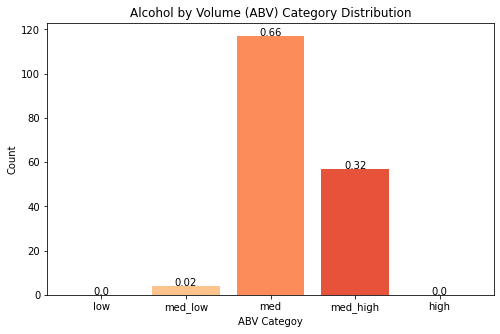

In [14]:
"""
Get the probability distribution of wines based from ABV categories
"""
wines = df_wine.copy()

# Step 1: Create dictionary of the ABV categories with 'categery name' as keys 
# and 'count per category' as values
wine_type = {}
wine_type['low'] = wines[wines.alcohol < 10]
wine_type['med_low'] = wines[(wines.alcohol >= 10) & (wines.alcohol < 11.5)]
wine_type['med'] = wines[(wines.alcohol >= 11.5) & (wines.alcohol < 13.5)]
wine_type['med_high'] = wines[(wines.alcohol >= 13.5) & (wines.alcohol < 15)]
wine_type['high']= wines[wines.alcohol >= 15]

# creates another column 'ABV' and assigns its value
wines.loc[wines.alcohol < 10,'ABV'] = 'low'
wines.loc[(wines.alcohol >= 10) & (wines.alcohol < 11.5),'ABV'] = 'med_low'
wines.loc[(wines.alcohol >= 11.5) & (wines.alcohol < 13.5),'ABV'] = 'med'
wines.loc[(wines.alcohol >= 13.5) & (wines.alcohol < 15),'ABV'] = 'med_high'
wines.loc[wines.alcohol >= 15,'ABV'] = 'high'

# Step 2: Compute for the probability for each category. Round to the hundredth
p_ABV = []
for i in [len(x) for x in wine_type.values()]:
    p_ABV.append(i/len(wines))

# Step 3: Graph the distribution
fig, ax = plt.subplots(figsize=(8,5))

ax.bar(wine_type.keys(), [len(x) for x in wine_type.values()],
        color=sns.color_palette("OrRd", 5), align='center')
ax.set_title('Alcohol by Volume (ABV) Category Distribution')
ax.set_xlabel('ABV Categoy')
ax.set_ylabel('Count')

for i in range(len(plt.xticks()[0])):
     plt.annotate(round(p_ABV[i], 2), xy=(plt.xticks()[0][i], 
                                          len(list(wine_type.values())[i])), 
                                          ha='center')
plt.show()

Based from the graph, we can see that majority ($ 66\% $ ) of wines produced from this region falls under the **Medium** ABV category or wines having 11.5% - 13.5% alcohol;  approximately a third ($ 32\%$) falls under **Medium-High**, or wines having 13.5% - 15% alcohol; and a small portion ($2\%$) is **Medium-Low**.

#### 3.1.2 Climate as one of the factors that contribute to the alcohol content

There are several factors that affect the alcohol content of wine and this includes the style of wine, quality level, and climate where the grapes grow [2]. The mentioned features are not included in the given data set, or at least not explicitly. However, one of the dataset features, which is `color_intensity`, is said to be positively correlated with climate.

The intensity of the color can be observed with the wine’s opacity. In warmer weather and climates, grapes ripen more easily, leading to lower acidity, higher sugar levels, and darker color. This means the *higher the alcohol content*, *the darker the wine is or it has higher color intensity value*.

Let us try to compare the `alcohol` and `color_intensity` distribution to see if our assumption stands true, grouped by its ABV category.

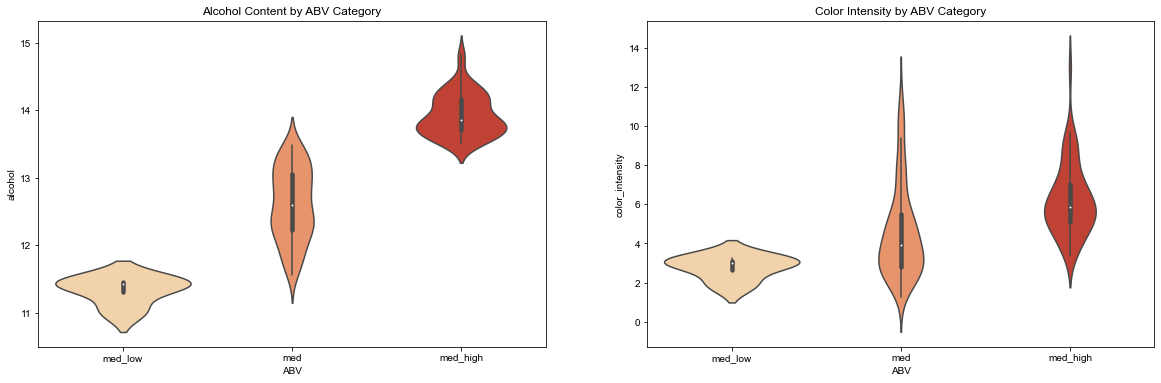

Correlation value of 'alcohol' and 'color_intensity': 0.5463641950837039


In [15]:
"""
Graph of Alcohol content and Color Intensity per ABV
"""
# Alcohol content
fig, ax = plt.subplots(1,2, figsize=(20,6))
ax[0].set_title('Alcohol Content by ABV Category')
ax[0].set_xlabel('ABV Categoy')
ax[0].set_ylabel('Alcohol Content')
sns.set(style='whitegrid')
sns.violinplot(wines['ABV'], wines['alcohol'], 
               order=['med_low', 'med', 'med_high'], ax=ax[0], palette='OrRd')

# Color Intensity
ax[1].set_title('Color Intensity by ABV Category')
ax[1].set_xlabel('ABV Categoy')
ax[1].set_ylabel('Color Intensity')
sns.set(style='whitegrid')
sns.violinplot(wines['ABV'], wines['color_intensity'], 
               order=['med_low', 'med', 'med_high'], ax=ax[1], palette='OrRd')

plt.show()

# Compute correlation of 'alcohol' and 'malic_acid'
print('Correlation value of \'alcohol\' and \'color_intensity\':', 
        wines.alcohol.corr(wines.color_intensity))

Although not that obvious, the violin plots show us that the distribution for the `color_intensity` (right) tend to span to higher values from *med_low* to *med_high*. The same trend can be observed on the `alcohol` content (left) -- but more obvious.

Based on computation attributes `alcohol` and `color_intensity` have positive $0.55$ correlation. Not that strong correlation I must say, but above the midpoint $0.50$.

Below is the table of sample Italian wines based on alcohol content. If we check the [Red Wine Boldness Chart](https://winefolly.com/deep-dive/know-a-wine-just-by-looking-at-the-color/), we can observe that light-bodied wines tend to be lighter and gets bolder as the wine gets to medium and full body. If we try to check the location, most of these wines can be found in the [Northern](https://www.lifeinitaly.com/wines/wines-of-northern-italy) and [Central](https://www.lifeinitaly.com/wines/wines-of-central-italy) regions of Italy and very few, if not none, in the [Southern](https://www.lifeinitaly.com/wines/wines-of-southern-italy) region, where the climate is usually warmer.

|Medium Low                 | Medium                 |Medium High                                    |
|---------------------------|------------------------|-----------------------------------------------|
|Lambrusco (*light body*)   |Chianti (*medium body*) |Amarone della Valpolicella (*medium-full body*)|
|Soave (*light body*)       |Barbera (*medium body*) |Brunelo di Montalcino (*medium-full body*)     |
|Pinot Grigio (*light body*)|Nebbiolo (*medium body*)|Nero d'Avola (*medium-full body*)              |

#### 3.1.3 Conclusion

1. Based on the data that we have, we can say that it is probable that the higher the alcohol content in wine is, the more likely it is to come from or cultivated from regions with warmer climates.

2. Wines from these regions (Northern and Central) generally have medium alcohol levels, so if you're not for a long wine night talks, maybe you can explore other wines from the southern regions such as Sicily or other countries like Portugal and France where they have wines with a higher level of alcohol.

### 3.2 k-Nearest Neighbor (kNN) Machine Learning Classification
<span id='obj2'></span>

<img src='resources/images/uchiha_senju.jpg'>

#### 3.2.1 What is kNN?


**kNN Classifier** is a non-parametric and easy to implement classification algorithm. *Non-parametric* means the algorithm does not assume any data distribution (e.g., Gaussian). I won't be able to completely discuss the algorithm in this notebook, but it follows the same logic with the saying,
>_"Birds of a feather flock together."_

or
>_"Tell me who your friends are, and I'll tell you who you are."_

kNN is a proximity-based classifier. In other words, the classification is based on the **$k$-nearest neighbor** as the name suggests. $k$ here is the number of _"nearest neighbors"_ that the algorithm needs to consider to predict the class of our target. To better understand this, let's look at the below visualization.

<img src='resources/images/knn_sample.jpg'>
<center style="font-style: italic">source: https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn</center>

For this instance, the new sample will be classified as **Class B if** $\mathbf{k = 3}$ because our target has more Class B data points (*2 triangles*) nearer to it as compared to Class A (*1 star*).

On the other hand, if we increase the number of neighbors -- $\mathbf{k = 7}$ -- there will now be more Class A (*4 stars*) than Class B (*3 triangles*) data points nearer to it; thus the new sample will be classified now as __Class A__.

You may want to check this [site](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn) for a more detailed explanation of the algorithm.

Our goal is to find the optimal $k$ neighbors that would yield the highest prediction accuracy.

#### 3.2.2 Proportion Chane Criterion

The formula for the *Proportion Chance Criterion* ($\mathbf{P}_{CC}$) is given by,

$$
\mathbf{P}_{CC} = \sum_{i=1}{(\frac{n_i}{N})^2}
$$

where $n$ is the number of samples in class $i$; and $N$ is the total number of population.

As a rule of the thumb, a classifier machine learning model is considered successful when the test accuracy is higher than $1.25\mathbf{P}_{CC}$.

Class 0 59 (33.15%)
Class 1 71 (39.89%)
Class 2 48 (26.97%)


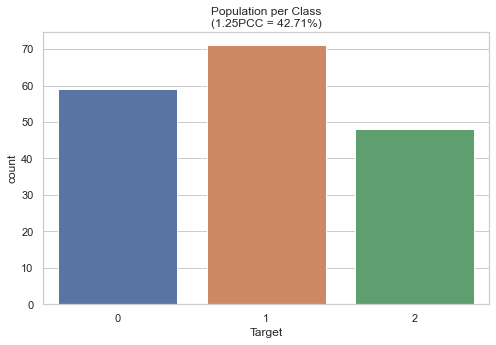

In [16]:

state_counts = Counter(df_wine['Target'])

df_state = pd.DataFrame.from_dict(state_counts, orient='index')

num = (df_state/df_state.sum())**2
pcc = float(1.25 * 100 * num.sum())


class_count = df_wine.groupby('Target').size()
class_dist = round((class_count/class_count.sum())*100, 2)
for i in range(len(class_count)):
    print(f'Class {i}', class_count[i], f'({class_dist[i]}%)')

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(df_wine['Target'], ax=ax)
ax.set_title('Population per Class\n'
             '(1.25PCC = {}%)'.format(round(pcc, 2)))
plt.show()

Based on our computation, the accuracy score that we need to beat is $42.71\%$. Quite low for accuracy baselining, but let's accept this for now.

#### 3.2.3 Traning the Model

For this model, we will run $100$ iterations for $k$ = $1$ to $100$ and get the most optimal $k$ number of neighbors.

In [17]:
# import necesarry libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [18]:
iteration = 100 # number of iteration
n = 100 # number of neighbors to scan

df_features = df_wine.drop('Target', axis=1)

# for storing ALL the training and test accuracies
all_training = pd.DataFrame()
all_test = pd.DataFrame()

iterations = range(iteration)
n_neighbors = range(1, n+1)

for seedN in iterations:
    # split dataset into training and test set; 75-25 train-test ratio
    X_train, X_test, y_train, y_test = train_test_split(df_features, df_wine['Target'], 
                                                        test_size=0.25, random_state=seedN)
    training_accuracy = []
    test_accuracy = []
    
    # iterate for each k-neighbor
    for k_neighbor in n_neighbors:   
        clf = KNeighborsClassifier(n_neighbors=k_neighbor)  # build the model
        clf.fit(X_train, y_train)

        training_accuracy.append(clf.score(X_train, y_train)) # record training set accuracy
        test_accuracy.append(clf.score(X_test, y_test)) # record generalization/test accuracy
    
    # store the generated train and test scores for each neighbors
    all_training[seedN]=training_accuracy
    all_test[seedN] = test_accuracy

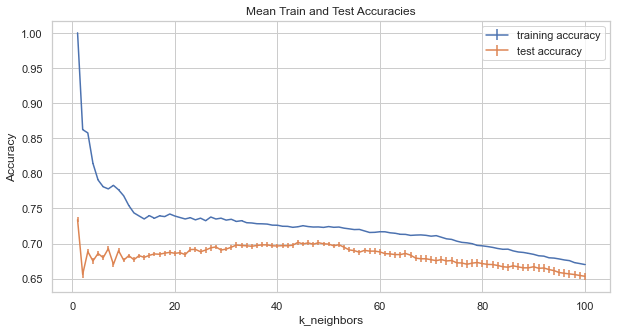

In [47]:
# plot the mean train and test scores per k-neighbor.
plt.figure(figsize=(10,5))
plt.errorbar(n_neighbors, all_training.mean(axis=1),
             yerr=all_training.var(axis=1), label="training accuracy")
plt.errorbar(n_neighbors, all_test.mean(axis=1),
             yerr=all_test.var(axis=1), label="test accuracy")

plt.ylabel("Accuracy")
plt.xlabel("k_neighbors")
plt.legend()
plt.title('Mean Train and Test Accuracies')
plt.show()

The graph shows that the highest test accuracy is when $k$ is $1$. However, the train and test accuracies are closer to each other when $k$ is at around $30-50$. Why the difference between train and test accuracies will be discussed in the succeeding sections.

In [64]:
max_test = np.amax(all_test.mean(axis=1))
max_train = np.amax(all_training.mean(axis=1))
bestNN=np.argmax(all_test.mean(axis=1))+1

print('Train Accuracy:', max_train)
print('Test Accuracy:', max_test)
print('Optimal k:', bestNN)

Train Accuracy: 1.0
Test Accuracy: 0.7339999999999997
Optimal k: 1


If we only try to get the highest *test accuracy*, which is our main concern, we will get the optimal $k$ value $1$ with the above-shown training and test accuracies. However, having **training accuracy** of  $\mathbf{1}$, and a huge difference from the **test accuracy** -- $\mathbf{0.73}$ -- we can say that our model tends to **overfit**. In the next section, we will discuss some of the considerations in getting the optimal $k$ value.

#### 3.2.4 Finding the Optimal $k$-Nearest Neighbor

For this particular instance, it is not enough to just get the highest test accuracy to determine the optimal $k$ value because we will have an overfitted  model, which not good for predicting new data samples. Below are some of the key considerations for getting the ideal $k$ value for our kNN model.

1. Test accuracy must exceed the computed $1.25\mathbf{P}_{CC}$ value (section 3.2.2). For this dataset, our $1.25\mathbf{P}_{CC}$ is $42.71\%$.

2. There is a minimal gap between the computed *train* and *test* accuracies. The graph we have created in section 3.2.3 shows that train and test accuracies have lesser gaps when $k$ is between $30$ to $50$.

3. It is not enough that test accuracy exceeds the $1.25\mathbf{P}_{CC}$ and has the smallest train-test accuracy difference. Test accuracy should still be high enough to be considered a good classifier. (*We usually target at least 80%*)

Given these considerations, let's code our way to get the best $k$ value!

In [82]:
# get the mean for all k's
test_mean = all_test.mean(axis=1)
train_mean = all_training.mean(axis=1)

df_acc = pd.DataFrame({'train': train_mean, 'test': test_mean})

# compute the difference of train and test
df_acc['gap'] = (df_acc['train'] - df_acc['test']).abs()

# 1. Test accuary must exceed the computed 1.25PCC
best_k = df_acc[df_acc.test > 0.4771]

# 2.  minimal gap between the computed train and test accuracies; k is 30-50
best_k = best_k[29:50] # remember that we are 0-based indexing

# 3. test accuracy should still be high enough to be considered a good classifier
best_k = best_k.sort_values(by='test', ascending=False)

print('Test Accuracy:', best_k.head(1)['test'].squeeze())
print('Train Accuracy:', best_k.head(1)['train'].squeeze())
print('Optimal k:', best_k.head(1).index[0] + 1)


Test Accuracy: 0.7017777777777775
Train Accuracy: 0.7239849624060147
Optimal k: 44


Following the listed considerations, we determined that we will get the best result when $k=44$, having a test accuracy of $70.18\% $.

#### 3.2.5 Conclusion

1. Using the kNN algorithm we have created a classifier that has $70.18\%$ accuracy using $44$ neighbors.
2. Although our model exceeded the computed $1.25\mathbf{P}_{CC}$ value($42.71\%$), which serves as our test accuracy baseline, we believe that this could still be improved using other classification algorithms.

## References
<span id='ref'></span>

[1] M. Bryner, *How Much Alcohol Is in My Drink?*, Live Science, Jul. 2010. Accessed on: Jul. 17, 2020. [Online]. Available: https://www.livescience.com/32735-how-much-alcohol-is-in-my-drink.htmlhttps://winefolly.com/tips/the-lightest-to-the-strongest-wine/

[2] M. Puckette, *Wine: From the Lightest to the Strongest*, Wine Folly, Nov. 2015. Accessed on Jul. 15, 2020. [Online]. Available: https://winefolly.com/tips/the-lightest-to-the-strongest-wine/